# CSE 252B: Computer Vision II, Winter 2018 – Assignment 3
### Instructor: Ben Ochoa
### Due: Wednesday, February 21, 2018, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

## Problem 1 (Programing):  Estimation of the camera pose - Outlier rejection (20 points)
  Download input data from the course website.  The file
  hw3_points3D.txt contains the coordinates of 60 scene points
  in 3D (each line of the file gives the $\tilde{X}_i$, $\tilde{Y}_i$,
  and $\tilde{Z}_i$ inhomogeneous coordinates of a point).  The file
  hw3_points2D.txt contains the coordinates of the 60
  corresponding image points in 2D (each line of the file gives the
  $\tilde{x}_i$ and $\tilde{y}_i$ inhomogeneous coordinates of a
  point).  The corresponding 3D scene and 2D image points contain both
  inlier and outlier correspondences.  For the inlier correspondences,
  the scene points have been randomly generated and projected to image
  points under a camera projection matrix (i.e., $\boldsymbol{x}_i = \boldsymbol{P}
  \boldsymbol{X}_i$), then noise has been added to the image point
  coordinates.

  The camera calibration matrix was calculated for a $1280 \times 720$
  sensor and $45\,^\circ$ horizontal field of view lens.  The
  resulting camera calibration matrix is given by
  
  $\boldsymbol{K} = \left[
    \begin{array}{c c c}
      1545.0966799187809 & 0 & 639.5\\
      0 & 1545.0966799187809 & 359.5\\
      0 & 0 & 1
    \end{array}\right]$
    
  For each image point $\boldsymbol{x} = (x, y, w)^\top = (\tilde{x},
  \tilde{y}, 1)^\top$, calculate the point in normalized coordinates
  $\hat{\boldsymbol{x}} = \boldsymbol{K}^{-1} \boldsymbol{x}$.

  Determine the set of inlier point correspondences using the
  M-estimator Sample Consensus (MSAC) algorithm, where the maximum
  number of attempts to find a consensus set is determined adaptively.
  For each trial, use the 3-point algorithm of Finsterwalder (as
  described in the paper by Haralick et al.) to estimate the camera
  pose (i.e., the rotation $\boldsymbol{R}$ and translation $\boldsymbol{t}$ from the
  world coordinate frame to the camera coordinate frame), resulting in
  up to 4 solutions, and calculate the error and cost for each
  solution.  Note that the 3-point algorithm requires the 2D points in
  normalized coordinates, not in image coordinates.  Calculate the
  projection error, which is the (squared) distance between projected
  points (the points in 3D projected under the normalized camera
  projection matrix $\hat{\boldsymbol{P}} = [\boldsymbol{R} | \boldsymbol{t}]$) and the
  measured points in normalized coordinates (hint: the error tolerance
  is simpler to calculate in image coordinates using $\boldsymbol{P} =
  \boldsymbol{K} [\boldsymbol{R} | \boldsymbol{t}]$ than in normalized coordinates using
  $\hat{\boldsymbol{P}} = [\boldsymbol{R} | \boldsymbol{t}]$).

 hint: this problem has codimension 2).

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x=np.loadtxt('hw3_points2D.txt').T
X=np.loadtxt('hw3_points3D.txt').T
print('x is', x.shape)
print('X is', X.shape)

K = np.array([[1545.0966799187809, 0, 639.5], 
      [0, 1545.0966799187809, 359.5], 
      [0, 0, 1]])

print('K =')
print(K)

def toHomo(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))
def fromHomo(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1,:]/x[-1,:]

def proj(P,X):
    # projects 3d points X to 2d using projection matrix P
    return fromHomo(np.matmul(P,toHomo(X)))
    
    
def displayResults(R, t, K, x, X, inliers, iters, cost):
    print ('R = ')
    print (R)
    print ('t = ')
    print (t)
    print ('cost = ', cost)
    print ('itterations = ', iters)

    x_proj = proj(np.matmul(K,np.hstack((R,t))),X)
    plt.plot(x[0,:], x[1,:],'.k')
    plt.plot(x_proj[0,:], x_proj[1,:],'.r')
    for i in range(x.shape[1]):
        if i in inliers:
            line_style = '-'
        else:
            line_style = ':'
        plt.plot([x[0,i], x_proj[0,i]], [x[1,i], x_proj[1,i]], line_style+'r')

    plt.show()
    

x is (2, 60)
X is (3, 60)
K =
[[  1.54509668e+03   0.00000000e+00   6.39500000e+02]
 [  0.00000000e+00   1.54509668e+03   3.59500000e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


R = 
[[ 0.28376096 -0.68584846  0.67014298]
 [ 0.67249603 -0.35584393 -0.64894082]
 [ 0.68354137  0.63481256  0.36025575]]
t = 
[[   6.15220928]
 [   8.7117754 ]
 [ 175.84962174]]
cost =  195.066036804
itterations =  13


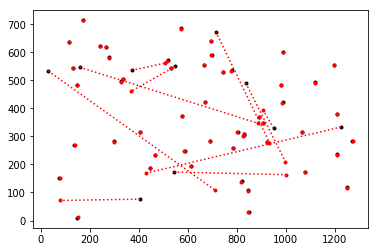

inliers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
inlier count:  42


In [19]:
def MSAC(x, X, K, max_iters):
    
    def consensus_cost(err_in, tolerance): 
        '''
        calculate the cost using the error of each pair points
        return the cost value and the inlier number
        inlier number is counted when the error is less than tolerance.
        '''
        
        cost_out = 0 # initial cost to 0
        count = 0 # intilal count to 0
        for i in range(len(err_in)): # calculate cost and inlier number.
            if err_in[i] > tolerance:
                cost_out = cost_out + tolerance
            else:
                cost_out = cost_out + err_in[i]
                count += 1
        return cost_out,count
    
    def error_cal(x_norm ,X,R,T,K):
        '''
        return the error for each point
        input are normalized homogeneous 2-d point coordinates /
        3-d point in world frame / 
        rotation matrix /
        translation vector /
        calibration matrix
        '''
        
        x_norm = np.mat(x_norm)
        X = np.mat(X)
        R = np.mat(R)
        T = np.mat(T)
        P = np.mat(np.hstack((R,T))) # construct P = [R|t]
        
        # translate to image frame
        x_ori = K * x_norm   
        # calculate estimated points in image frame
        x_esti = K * P * toHomo(X) 
        # calculate the difference between estimated and given points
        diff = fromHomo(x_esti) - fromHomo(x_ori) 
        # calculate error
        err_out = np.power(np.linalg.norm(diff,axis = 0), 2) 

        return err_out

    
    def model2_cal(Y,X):
        '''
        Calculate the rotation matrix and translation vector.
        input are three 3-d coordinates in camera frame Y, a 9 * 1 vector  
        and three corresponding 3-d coordinates in world frame X, a 3*3 matrix.
        '''
        X1_1 = Y[0:3,0] 
        X1_2 = Y[3:6,0]
        X1_3 = Y[6:9,0]
        X = np.mat(X)
        Y_mean = (X1_1 + X1_2 + X1_3) / 3
        X_mean = np.mat(np.mean(X,1))
        Sigma_xy1 = (X1_1 - Y_mean) * (np.mat(X[:,0]) - X_mean).T\
        + (X1_2 - Y_mean) * (X[:,1] - X_mean).T\
        + (X1_3 - Y_mean) * (X[:,2] - X_mean).T
        Sigma_xy1 = Sigma_xy1 / 3 # calculate covariance Sigma

        U,D,Vt = np.linalg.svd(Sigma_xy1) # SVD Sigma
        S = np.eye(3)
        if np.linalg.det(U) * np.linalg.det(Vt) < 0:
            S[2][2] = -1

        R_out = (U * S * Vt) # calcualte rotation matrix
        t_out = Y_mean - R_out * X_mean # calculate translation vector
        P_out = np.hstack((R_out,t_out))

        return R_out,t_out
    
    def model1_cal(x_norm, X_sample, K):
        '''
        input: 
        x_norm: three normalized 2-d points coordinates
        X_sample: three corresponding 3-d coordinates
        K: Calibrate matrix 
        
        output:
        False: If no valid solution can be generated. False is returned.
        X_out: Solutions for the 3-d coordinates in Camera frame. 
        Dimension is 12 * N
        where N is the possible solution number from 1 to 4.
        '''
        K = np.mat(K)
        x_norm = np.mat(x_norm)
        X_sample = np.mat(X_sample)
        # ---------------------------------------------------------

        a = np.linalg.norm(X_sample[:,1] - X_sample[:,2])
        b = np.linalg.norm(X_sample[:,0] - X_sample[:,2])
        c = np.linalg.norm(X_sample[:,0] - X_sample[:,1])

        flag = 0 # flag to check whether there are valid solutions.
        # unit vector
        j1 = np.sign(x_norm[2,0]) * np.mat(x_norm[:,0]) / np.linalg.norm(x_norm[:,0]) 
        j2 = np.sign(x_norm[2,1]) * np.mat(x_norm[:,1]) / np.linalg.norm(x_norm[:,1])
        j3 = np.sign(x_norm[2,2]) * np.mat(x_norm[:,2]) / np.linalg.norm(x_norm[:,2])

        alpha_cos = float(j2.T * j3)
        alpha_sin2 = 1 - alpha_cos**2
        beta_cos = float(j1.T * j3)
        beta_sin2 = 1 - beta_cos**2
        gamma_cos = float(j1.T * j2)
        gamma_sin2 = 1 - gamma_cos**2

        G = c**2 * (c**2 * beta_sin2 - b**2 * gamma_sin2)
        H = b**2 * (b**2 - a**2) * gamma_sin2 + c**2 * (c**2 + 2 * a**2) * beta_sin2 +\
        2 * b**2 * c**2 * (-1 + alpha_cos * beta_cos * gamma_cos)
        I = b**2 * (b**2 - c**2) * alpha_sin2 + a**2 * (a**2 + 2 * c**2) * beta_sin2 +\
        2 * a**2 * b**2 * (-1 + alpha_cos * beta_cos * gamma_cos)
        J = a**2 * (a**2 * beta_sin2 - b**2 * alpha_sin2)

        root_temp = np.roots([G, H, I, J]) #calculate lambda.

        for i in root_temp:
            if np.isreal(i):   # check if lambda is real, if not, try another 
                # --------------------------------------
                A = 1 + i
                B = -alpha_cos
                C = (b**2 - a**2) / b**2 - i * c**2 / b**2
                D = -i * gamma_cos
                E = (a**2 / b**2 + i * c**2 / b**2) * beta_cos
                F = -a**2 / b**2 + i * (b**2 - c**2) / b**2

                det_mat = np.mat([[A,B,D],[B,C,E],[D,E,F]])
                #print('det_',np.linalg.det(det_mat))

                p = complex(B**2 - A * C)**0.5
                #print('B^-AC_0', (B**2 - A * C))
                #print('test',(B**2 - A * C)**0.5)
                q = np.sign(B * E - C * D) * complex(E**2 - C * F)**0.5
                #print('p,q',p,q)
                m = np.mat(np.hstack(((-B + p) / C , (-B - p) / C)))
                n = np.mat(np.hstack((-(E - q) / C , -(E + q) / C)))

                A_1 = b**2 - c**2 * np.power(m,2) 
                B_1 = c**2 * np.multiply((beta_cos - n), m) - b**2 * gamma_cos
                C_1 = -c**2 * np.power(n,2) + 2 * c**2 * beta_cos * n + b**2 - c**2

                # check if there are valid solutions, u,v. 
                # if there are, set lambda, set flag. 
                # Otherwise, pass  
                if ((np.real(B_1[0,0]) ** 2 - np.real(A_1[0,0])\
                     * np.real(C_1[0,0])) >= 0) or\
                ((np.real(B_1[0,1]) ** 2 - np.real(A_1[0,1])\
                  * np.real(C_1[0,1])) >= 0):
                    lbd = i
                    flag = 1

        if flag == 0: # if no valid solutions, return false
            return False
        
        # - ---------------------- use lambda to calculate u ,v
        # there are up to 4 solutions, so there are up to 4 columns for each points.
        # only valid solutions are preserved. 
        
        A = 1 + lbd
        B = -alpha_cos
        C = (b**2 - a**2) / b**2 - lbd * c**2 / b**2
        D = -lbd * gamma_cos
        E = (a**2 / b**2 + lbd * c**2 / b**2) * beta_cos
        F = -a**2 / b**2 + lbd * (b**2 - c**2) / b**2

        p = (complex(B**2 - A * C))**0.5
        q = np.sign(B * E - C * D) * complex(E**2 - C * F)**0.5

        m = np.mat(np.hstack(((-B + p) / C , (-B - p) / C)))
        n = np.mat(np.hstack((-(E - q) / C , -(E + q) / C)))

        A_1 = b**2 - np.power(m,2) * c**2
        B_1 = c**2 * np.multiply((beta_cos - n), m) - b**2 * gamma_cos
        C_1 = -c**2 * np.power(n,2) + 2 * c**2 * beta_cos * n + b**2 - c**2        
        
        # calculate u
        u_large = np.multiply(np.divide(-np.sign(B_1), A_1) ,
        (np.abs(B_1) + np.sqrt(np.power(B_1,2) - np.multiply(A_1 , C_1))))
        u_small = np.divide(C_1 , np.multiply(A_1 , u_large ))
        # calculate corresponding v
        v_large = np.multiply(u_large , m) + n
        v_small = np.multiply(u_small , m) + n

        u = np.hstack((u_large,u_small))
        v = np.hstack((v_large,v_small))

        u_out = []
        v_out = []

        for i in range(4): # check if u, v are valid. 
            if (np.isreal(u[0,i])) and (np.isreal(v[0,i])) and\
            (not (np.isnan(u[0,i]) and np.isnan(v[0,i]))):
                u_out.append(np.real(u[0,i]))
                v_out.append(np.real(v[0,i]))

        uv_out = np.mat(np.vstack((u_out,v_out)))
        
        # calculate s1
        s1 = np.sqrt(np.divide(a**2 , (np.power(uv_out[0],2) +\
                   np.power(uv_out[1],2) - 2 * alpha_cos *\
                    np.multiply(uv_out[0],uv_out[1]))))
        #s1_t1 = b**2 / (1 + np.power(uv_out[1],2) - 2 * beta_cos * uv_out[1])
        #s1_t2 = c**2 / (1 + np.power(uv_out[0],2) - 2 * gamma_cos * uv_out[0])

        
        # calculate coordiantes in camera frame for each points. 
        # Dim = 3*N matrix  1 <= N <= 4
        X1_1 = j1 * s1 
        X1_2 = j2 * np.multiply(u_out , s1)
        X1_3 = j3 * np.multiply(v_out , s1)
        
        # stack three points to a matrix. Dim = 9*N 
        X_out = np.vstack((X1_1, X1_2, X1_3))
        
        return X_out
    
    # --------------------------------------------------------------------main part
    import random
    
    iters = 0 # number of MSAC itterations executed
    x_len = x.shape[1] # number of input points
    p = 0.99 # set initial probability to 0.99
    # set tolerance using: alpha = 0.95 codimension = 2 assume sigma = 1
    tolerance = 5.9915 
    
    # ----------------------------------- start MSAC
    conMincost = np.inf # initial mincost = inf
    # calcuate normalized 2-d points coordinates
    x_norm = np.linalg.inv(K) * np.mat(toHomo(x)) 
    # set stop criteria
    while (iters < max_iters) and (conMincost > 160): 
        iters = iters + 1
        # random generate index for three points
        ind_rand = random.sample(list(range(x_len)),3) 
        x_sample = x_norm[:,ind_rand]
        X_sample = X[:,ind_rand]
        # calculate 3-d coordinates in camera frame
        sample_flag = model1_cal(x_sample, X_sample, K) 
        # if no solution for these points, try another trial
        if sample_flag is False: 
            continue
        # for each possible solution given 
        for pos_num in range(sample_flag.shape[1]): 
            # calculate rotation and tranlation
            R_temp,T_temp = model2_cal(sample_flag[:,pos_num], X_sample) 
            # calculate error
            error_pop = error_cal(x_norm, np.mat(X), R_temp, T_temp,K) 
            # calculate cost and inlier number
            consCost, inlier_num = consensus_cost(error_pop , tolerance) 
        
            if consCost < conMincost: # if cost is less than mincost
                conMincost = consCost # record min cost
                R = R_temp # record model
                T = T_temp
                
                # calcualte maxiter number
                w = inlier_num / x_len 
                s = 3
                max_iters = np.abs(np.log(1 - p) / np.log(1 - w ** s))
    # calculate error for the best model
    error_out = error_cal(x_norm, np.mat(X), R, T,K) 
    # calculate cost and inlier number
    consCost, inlier_num = consensus_cost(error_pop , tolerance) 
    inliers = []
    # using the error to obtain inlier set
    for i in range(len(error_out)): 
        if error_out[i] < tolerance:
            inliers.append(i)
    cost = conMincost
    
    return R, T, inliers, cost, iters

# MSAC hyperparameters (add any additional hyperparameters necessary here. For example p)
# You should pass these hyperparameters as additional paramters to MSAC(...)

max_iters=10

R_MSAC, t_MSAC, inliers, cost_MSAC, iters_MSAC = MSAC(x, X, K, max_iters)
displayResults(R_MSAC, t_MSAC, K, x, X, inliers, iters_MSAC, cost_MSAC)
print('inliers: ', inliers)
print('inlier count: ', len(inliers))


## Problem 2 (Programing): Estimation of the camera pose - Linear Estimate (30 points)
  Estimate the normalized camera projection matrix
  $\hat{\boldsymbol{P}}_\text{linear} = [\boldsymbol{R}_\text{linear} |
  \boldsymbol{t}_\text{linear}]$ from the resulting set of inlier
  correspondences using the linear estimation method (based on the
  EPnP method) described in lecture.

R = 
[[ 0.28001294 -0.68922897  0.66824859]
 [ 0.6644642  -0.36326008 -0.65309221]
 [ 0.69287811  0.62690154  0.35625046]]
t = 
[[   5.75495579]
 [   7.87513133]
 [ 175.91576993]]
cost =  52.4299526182
itterations =  1


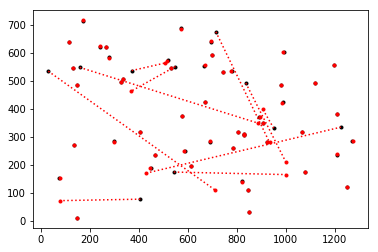

In [20]:
def EPnP(x, X, K):

    def error_cal(x_norm ,X,R,T,K):
    
        '''
        return the error for each point
        input are normalized homogeneous 2-d point coordinates /
        3-d point in world frame / 
        rotation matrix /
        translation vector /
        calibration matrix
        '''
        
        x_norm = np.mat(x_norm)
        X = np.mat(X)
        R = np.mat(R)
        T = np.mat(T)
        P = np.mat(np.hstack((R,T)))

        x_ori = K * x_norm

        x_esti = K * P * toHomo(X)
        diff = fromHomo(x_esti) - fromHomo(x_ori)
        err_out = np.power(np.linalg.norm(diff,axis = 0), 2)

        return err_out

    
    def consensus_cost(err_in):
        
        '''
        calculate the cost using the error of each pair points.
        all points are regarded as inliers.
        '''
        
        cost_out = 0
        count = 0
        for i in range(len(err_in)):
            cost_out = cost_out + err_in[i]
            count += 1
        return cost_out,count
    
    # ---------------------------------------------- main part
    
    cost = np.inf # linear cost

    
    x = np.mat(x)
    X = np.mat(X)
    K = np.mat(K)
    
    x_norm = np.mat(np.linalg.inv(K)) * np.mat(toHomo(x)) 
    # calculate normalized inhomogeneous 2-d points coordiantes
    x_norm_tilt = fromHomo(x_norm) 
    
    X_mean = np.mat(np.mean(X,1)) 
    # calculate Sigma
    Sigma_X = (X - X_mean) * (X - X_mean).T/x.shape[1] 
    U,D,Vt = np.linalg.svd(Sigma_X)
    V = Vt.T
    sigmaX_2 = np.trace(Sigma_X)
    # calculate s value
    s = np.sqrt(sigmaX_2 / 3) 
    
    C1 = X_mean
    C2 = s * V[:,0] + X_mean
    C3 = s * V[:,1] + X_mean
    C4 = s * V[:,2] + X_mean
    
    # set A matrix
    A_mat = np.hstack((C2 - C1, C3 - C1, C4 - C1))
    
    A_inv = Vt / s
    M = np.zeros((1,12)) 
    # save alpha for each x
    alphai_mat = np.zeros((4,1)) 
    for i in range(X.shape[1]): 
        b_mat = X[:,i] - C1
        alpha_mat = A_inv * b_mat
        
        # for each inlier points, calculate alpha
        alphai2 = float(alpha_mat[0])
        alphai3 = float(alpha_mat[1])
        alphai4 = float(alpha_mat[2])
        alphai1 = 1 - alphai2 - alphai3 - alphai4
        
        M_i1 = np.mat([alphai1, 0, -alphai1 * x_norm_tilt[0, i],\
                       alphai2, 0, -alphai2 * x_norm_tilt[0, i],\
                       alphai3, 0, -alphai3 * x_norm_tilt[0, i],\
                       alphai4, 0, -alphai4 * x_norm_tilt[0, i]])
        M_i2 = np.mat([0, alphai1, -alphai1 * x_norm_tilt[1, i],\
                       0, alphai2, -alphai2 * x_norm_tilt[1, i],\
                       0, alphai3, -alphai3 * x_norm_tilt[1, i],\
                       0, alphai4, -alphai4 * x_norm_tilt[1, i]])
        
        # construct M matrix
        M = np.vstack((M, M_i1, M_i2))
        
        #record alpha for each points
        alphai_temp = np.vstack((alphai1, alphai2, alphai3, alphai4))
        alphai_mat = np.mat(np.hstack((alphai_mat, alphai_temp)))

    # delete the first initial column/ row
    alphai_mat = np.delete(alphai_mat, 0, 1)
    M = np.delete(M,0,0)
    

    M_U, M_D, M_Vt = np.linalg.svd(np.mat(M))
    M_V = M_Vt.T
    
    # calculate control points using M
    
    Ccam_vec = M_V[:,11]
    Ccam1 = Ccam_vec[0:3]
    Ccam2 = Ccam_vec[3:6]
    Ccam3 = Ccam_vec[6:9]
    Ccam4 = Ccam_vec[9:12]
    Ccam_mat = np.hstack((Ccam1, Ccam2, Ccam3, Ccam4))

    
    # calculate 3-d coordiantes using alpha for each points
    X_cami = Ccam_mat * alphai_mat

    X_cam_mean = np.mean(X_cami,1)

    Sigma_X_cam = (X_cami - X_cam_mean) * (X_cami - X_cam_mean).T / x.shape[1]
    sigmaX_cam_2 = np.trace(Sigma_X_cam)

    beta = np.sign(X_cam_mean[2]) * np.sqrt(sigmaX_2 / sigmaX_cam_2)

    X_cam = float(beta) * X_cami

    # using least square method to calculate rotation matrix and tranlation vector 
    X_cam_mean = np.mean(X_cam,1)
    X_wld_mean = np.mean(X,1)

    q_cam = np.mat(X_cam - X_cam_mean)
    q_wld = np.mat(X - X_wld_mean)

    H = q_cam * q_wld.T

    U_H, D_H, Vt_H = np.linalg.svd(H)
    V_H = Vt_H.T

    S = np.eye(3)

    if np.linalg.det(V_H) * np.linalg.det(U_H.T) < 0:
        S[2][2] = -1
    
    R = U_H * S * Vt_H
 
    t = X_cam_mean - R * X_wld_mean
    
    # calculate error and cost for this model
    error_pop = error_cal(x_norm, np.mat(X), R, t,K)
    cost, num_temp = consensus_cost(error_pop )
    
    return R, t, cost
R_EPnP, t_EPnP, cost_EPnP = EPnP(x[:,inliers], X[:,inliers], K)
displayResults(R_EPnP, t_EPnP, K, x, X, inliers, 1, cost_EPnP)


## Problem 3 (Programing): Estimation of the camera pose - Nonlinear Estimate (30 points) 
  Use $\boldsymbol{R}_\text{linear}$ and $\boldsymbol{t}_\text{linear}$ as an
  initial estimate to an iterative estimation method, specifically the
  Levenberg-Marquardt algorithm, to determine the Maximum Likelihood
  estimate of the camera pose that minimizes the projection error
  under the normalized camera projection matrix $\hat{\boldsymbol{P}} =
  [\boldsymbol{R} | \boldsymbol{t}]$.  You must parameterize the camera rotation
  using the angle-axis representation $\boldsymbol{\omega}$ (where
  $[\boldsymbol{\omega}]_\times = \ln \boldsymbol{R}$) of a 3D rotation, which is
  a 3-vector.

iter 1 cost 52.354061
iter 2 cost 52.354060
iter 3 cost 52.354060
iter 4 cost 52.354060
iter 5 cost 52.354060
iter 6 cost 52.354060
iter 7 cost 52.354060
iter 8 cost 52.354060
iter 9 cost 52.354060
iter 10 cost 52.354060
R = 
[[ 0.27984952 -0.689378    0.66816332]
 [ 0.66364594 -0.36399833 -0.65351303]
 [ 0.69372784  0.62630918  0.35563815]]
t = 
[[   5.73690467]
 [   7.78588539]
 [ 175.91866142]]
cost =  52.3540604922
itterations =  10


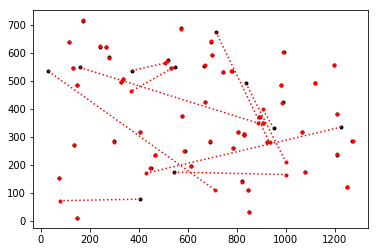

In [21]:
def R2w(R):
    # given a rotation matrix R return the angle-axis representation
    """your code here"""
    
    v_hat = np.mat([[R[2,1] - R[1,2]], [R[0,2]-R[2,0]],[R[1,0]-R[0,1]]])
    u_tmp, d_tmp , vt = np.linalg.svd(R-np.eye(3))
    v = vt[2,:].T
    
    theta_sin = v.T * v_hat / 2
    theta_cos = (np.trace(R) - 1) / 2
    
    theta = np.arctan2(theta_sin , theta_cos)
    w = theta[0,0] * v
    return w

def w2R(w):
    # given the angle-axis representation w return the rotation matrix
    """your code here"""
    pi = np.pi
    theta = np.linalg.norm(w)
    v = w / theta
    w_x = np.mat([[0,-w[2],w[1]],[w[2],0,-w[0]],[-w[1],w[0],0]])
    R = np.cos(theta) * np.eye(3) + np.sinc(theta / pi) * w_x +\
    (1 - np.cos(theta)) * w * w.T / theta**2
        
    return R


def LMstep(w, t, x, X, K, l, v):
    # inputs:
    # w current estimate of rotation in angle-axis representation
    # t current estimate of t
    # x 2D points
    # X 3D points
    # K camera calibration matrix 
    # l LM lambda parameter
    # v LM change of lambda parameter
    
    # output:
    # R updated by a single LM step
    # t updated by a single LM step
    # cost
    # l accepted lambda parameter
    
    def dsincx_dx(x_input):
        '''
        Calculate dsinc(x)/dx 
        '''
        if x_input == 0:
            return 0
        else:
            return (np.cos(x_input) / x_input - np.sin(x_input) / x_input**2)
    
    def x_matrix(x_input):
        assert x_input.shape[0] == 3
        x_out = np.mat([[0, -x_input[2,0], x_input[1,0]],\
                        [x_input[2,0], 0, -x_input[0,0]],\
                        [-x_input[1,0], x_input[0,0], 0]])
        return x_out
        
    """your code here"""
    cost = np.inf
    pi = np.pi
    w = np.mat(w)
    t = np.mat(t)
    x = np.mat(x)
    X = np.mat(X)
    K = np.mat(K)
    
    x_norm = np.linalg.inv(K) * toHomo(x) # calculate normalized 2-d points
    K_inv = np.linalg.inv(K) 
    # calculate Sigma for normalized points
    Sigma_Xi = K_inv[0:2,0:2] * np.eye(2) * K_inv[0:2,0:2].T 
    x_norm_tilt = fromHomo(x_norm) # get inhomogeneous 2-d points
    R = np.mat(w2R(w)) # get rotation matrix from w
    Xr = R * X # get 3-d coordinates in camera frame.

    x_hat = fromHomo(Xr + t)
    w_norm = np.linalg.norm(w) # norm of w vector
    # -------------------------------------- 
    U_star = np.zeros((6,6)) # set U = 0
    epsilon_a = np.zeros((6,1)) # set epsilon_a = 0
    # calculate s based on the Jacobian file
    s_tmp = (1 - np.cos(w_norm)) / w_norm**2 
    # calculate ds/dw based on the Jacobian file
    ds_dw = (w_norm * np.sin(w_norm) - 2 * (1 - np.cos(w_norm))) / w_norm**3 
    
    for i in range(X.shape[1]): # for each corresponding points
        Xri = Xr[:,i]
        Xi = X[:,i]
        w_hat = float(Xri[2,:] + t[2,0])
        x_norm_tilti = x_norm_tilt[:,i]
        dx_dXr1 = [1 / w_hat, 0, -x_norm_tilt[0,i] / w_hat]
        dx_dXr2 = [0, 1 / w_hat, -x_norm_tilt[1,i] / w_hat]
        # calculate dx/dXr
        dx_dXr = np.mat(np.vstack((dx_dXr1,dx_dXr2)))
        
        Xr_minus_x = x_matrix(-Xri)
        # calculate dXr/dw
        if np.linalg.norm(w) == 0 :
            dXr_dw = Xr_minus_x
        else: 
            dXr_dw = np.sinc(w_norm / pi) * x_matrix(-Xi) + np.cross(w.T , Xi.T).T *\
                    dsincx_dx(w_norm) * w.T / w_norm + \
                    np.cross(w.T,np.cross(w.T, Xi.T)).T * ds_dw * w.T / w_norm + \
                    s_tmp * np.eye(3) * (x_matrix(w) * x_matrix(-Xi) +\
                    x_matrix(-np.cross(w.T,Xi.T).T))
        # calculate dx/dw
        dx_dw = dx_dXr * dXr_dw
        
        # calculate dx/dt
        wt_hat = float(R[2,:] * Xi + t[2,0])
        dx_dt1 = [1 / wt_hat, 0, -x_norm_tilti[0] / wt_hat]
        dx_dt2 = [0, 1 / wt_hat, -x_norm_tilti[1] / wt_hat]
        dx_dt = np.mat(np.vstack((dx_dt1,dx_dt2)))
        
        Ai = np.hstack((dx_dw, dx_dt))
        
        diff_x = x_norm_tilti - fromHomo(Xri + t)
        # calculate U and epsilon_a
        U_star = U_star + Ai.T * np.linalg.inv(Sigma_Xi) * Ai
        epsilon_a = epsilon_a + Ai.T * np.linalg.inv(Sigma_Xi) * diff_x
    
    # --------------------------------------- while 1
    
    while True:
        
        U_star_I = U_star + l * np.eye(6) # augment matrix
        
        delta_a = np.linalg.inv(U_star_I.T * U_star_I) *\
                U_star_I.T * epsilon_a # calculate delta

        w0 = w + delta_a[0:3,0] # calculate new w and t
        t0 = t + delta_a[3:6,0]

        x0_hat = w2R(w0) * X + t0 # 2-d estimation using new w and t
        x1_hat = w2R(w) * X + t # 2-d estimation using original w and t
        # calculate error
        diff_x0 = x_norm_tilt - fromHomo(x0_hat) 
        diff_x1 = x_norm_tilt - fromHomo(x1_hat)
        epsilon_0 = np.trace(diff_x0.T * np.linalg.inv(Sigma_Xi) * diff_x0)
        epsilon = np.trace(diff_x1.T * np.linalg.inv(Sigma_Xi) * diff_x1)

        #print("epsilon_0/epsilon", epsilon_0,epsilon)
        
        # judge two cost and decide.
        if (epsilon_0 <= epsilon):
            w = w0
            t = t0
            l = l / v
            cost = epsilon_0
            break
        else:
            l = l * v
    
    return w, t, cost, l

# use linear estimate as an initalization for LM
w_LM = R2w(R_EPnP)
t_LM = t_EPnP


# LM hyperparameters
l=.001
v=10
max_iters=10

# LM optimization loop
for i in range(max_iters):
    w_LM, t_LM, cost_LM, l = LMstep(w_LM, t_LM, x[:,inliers], X[:,inliers], K, l, v)
    print ('iter %d cost %f'%(i+1, cost_LM))
R_LM = w2R(w_LM)
    
displayResults(R_LM, t_LM, K, x, X, inliers, i+1, cost_LM)
